# Mnist 데이터셋을 이용한 손글씨 분류하기 : DNN, CNN
- 딥러닝 손글씨 분류 공부
- 참고 : https://codingcrews.github.io/2019/01/17/mnist/

## 데이터셋 확인
사용할 MNIST 데이터 세트는 텐서플로 패키지에서 다운로드까지 진행해주는 코드를 포함 시켜두었습니다.<br/>
우리가 사용할 데이터셋은 텐서플로 패키지에서 제공하는 데이터셋을 이용한건데요. <br/>다른곳에서 MNIST 데이터셋을 이용하여 진행해봐도 무방합니다.<br/><br/>
우리가 사용할 MNIST 데이터는 손글씨 데이터로써 흑백 Gray Scale로 된 데이터셋을 말합니다.<br/>
28x28  사이즈의 단일 색상채널을 가지고 있으며, 트레이닝셋과 테스트셋이 각각 60,000개와 10,00개로 구성되어 있습니다.

### 데이터 다운로드


In [ ]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### 데이터 확인

In [ ]:
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

display(y_test)

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

데이터는 60,000개의 트레이닝셋가 10,000개의 테스트셋을 확인할 수 있고, <br/>테스트 데이터는 28x28 사이즈의 이미지 데이터임을 확인할 수 있습니다.(색상 채널은 단일 채널이라 표기 x)<br/>
레이블 데이터는 0~9까지의 10개의 클래스로 구성되어 있습니다.

### 데이터 시각화
우리가 다룰 MNIST 데이터는 이미지 데이터 기반입니다.<br/>
해당 이미지를 시각화하여 확인해보겠습니다.

In [ ]:
import matplotlib.pyplot as plt

def show_data(arr):
    plt.imshow(arr, cmap=plt.cm.binary)
    
    reshape_data = arr.reshape(-1, )
    for index, data in enumerate(reshape_data):
        print('{:3d}'.format(data), end='')
        if index % 28 == 27:
            print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

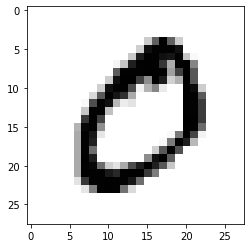

In [ ]:
show_data(x_train[1])

- 해당 데이터를 시각화 한 결과
- 28x28의 데이터는 각 픽셀별로 해당 픽셀이 표시해야할 생삭값을 표시하는데,<br/> 이걸 28x28사이즈에 맞춰 해당데이터를 출력한 결과입니다.
- 이미지는 matplotlib를 이용하여 데이터를 시각화 한 결과입니다.

### 데이터 변환
- 이미지 데이터를 확인했을 때 0~255까지의 값을 가지고 있는걸 확인할 수 있습니다.<br/>
- 이걸 모델에 효율적으로 학습시키기 위해선 0~1 사이의 값으로 일반화(Nomalization)시키는 과정을 거쳐야 합니다.<br/>
- 그 이외에도 2D컨볼루셔널 레이어를 사용하기 위해선 채널에 대한 값도 명시되어 있어야 하기 때문에
(넓이, 높이)의 형태를 가진 데이터를 (넓이,높이,채널)의 형태로 변환시켜보겠습니다.
- 구조는 어떤식으로든 상광없으며 (채널,넓이,높이) 순으로 정렬을 시켜도 됩니다.

In [ ]:
reshape_x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
reshape_x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


## 모델 구성
- Dense 레이어를 이용해 기본적인 신경망으로 학습을 진행해봅시다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.InputLayer(input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


총 3개의 레이어로 구성되어 있으며, MNIST 데이터셋에 맞춰 (28, 28, 1)의 형태에 맞춰 인풋 데이터를 받도록 구성했습니다.
<br/>
마지막층은 손글씨 데이터의 10개 클래스(0~9까지의 레이블)를 예측하기 위해 출력을 10으로, 활성함수는 softmax를 사용합니다.

### 모델 컴파일

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

### 모델 학습

In [ ]:
history = model.fit(
    reshape_x_train,
    y_train,
    batch_size=128,
    epochs=50,
    validation_split=.1,
)

Epoch 1/50
422/422 [==============================] - 4s 3ms/step - loss: 2.9646 - acc: 0.1574 - val_loss: 1.9209 - val_acc: 0.2935
Epoch 2/50
422/422 [==============================] - 1s 3ms/step - loss: 1.7838 - acc: 0.3263 - val_loss: 1.5727 - val_acc: 0.3923
Epoch 3/50
422/422 [==============================] - 1s 2ms/step - loss: 1.5153 - acc: 0.4194 - val_loss: 1.4405 - val_acc: 0.4403
Epoch 4/50
422/422 [==============================] - 1s 3ms/step - loss: 1.3242 - acc: 0.4844 - val_loss: 1.3254 - val_acc: 0.4523
Epoch 5/50
422/422 [==============================] - 1s 3ms/step - loss: 1.1006 - acc: 0.5863 - val_loss: 0.9971 - val_acc: 0.6333
Epoch 6/50
422/422 [==============================] - 1s 2ms/step - loss: 0.9405 - acc: 0.6399 - val_loss: 0.9092 - val_acc: 0.6440
Epoch 7/50
422/422 [==============================] - 1s 2ms/step - loss: 0.8387 - acc: 0.6744 - val_loss: 0.7850 - val_acc: 0.7235
Epoch 8/50
422/422 [==============================] - 1s 2ms/step - loss: 0.

### 정확도, 손실 시각화

In [ ]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

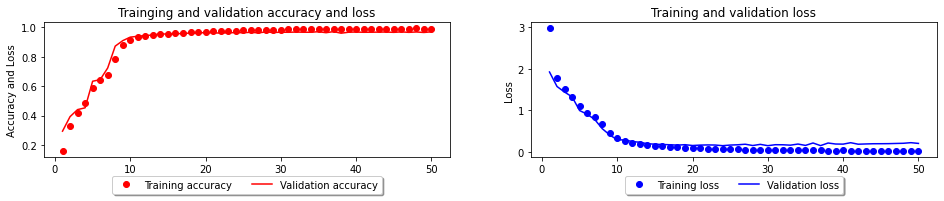

In [ ]:
show_graph(history.history)

첫번째 에폭의 결과가 너무 편차가 심하여 그래프를 알아보기 힘드니 <br/>10번째 에폭의 결과부터 그래프로 그려보도록 하겠습니다.

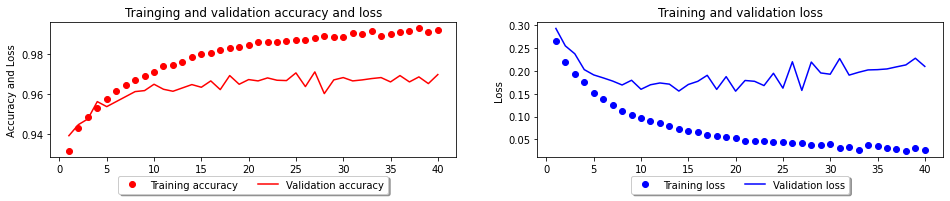

In [ ]:
m = map(lambda x: (x[0], x[1][10:]), history.history.items())
not_noise_history = dict(list(m))
show_graph(not_noise_history)

대략 20 에폭부터 과대적합이 시작되는걸 확인할 수 있습니다.

In [ ]:
model.evaluate(reshape_x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2246 - acc: 0.9672


[0.22463884949684143, 0.967199981212616]

96%의 정확도를 보여주고 있습니다.<br/>
레이어를 더 깊고 넓게 구성을 하여 높은 정확도를 만들어보겠습니다.

## 모델 구성 - CNN
지금까지 포스팅한 간단한 DNN으로도 MNIST 데이터셋의 분류를 높은 정확도로 만들 수 있습니다.<br/>
하지만 CNN을 이용하면 적은 파라메터로 좀더 정확한 모델을 구성할 수 있습니다.<br/>
간단한 CNN 모델을 구성해보겠습니다.

### 네트워크 구성
Kernel Initializer로는 유명한 Xavier Initializer를 사용합니다.

In [ ]:
model = Sequential()
# model.add(layers.InputLayer())
model.add(layers.Conv2D(
    input_shape=(28, 28, 1),
    filters=64, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal',
))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(
    filters=128, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal'
))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                62730     
Total params: 95,946
Trainable params: 95,946
Non-trainable params: 0
__________________________________________________

### 모델 컴파일
레이블 데이터를 원-핫 인코딩을 진행하지 않았기 때문에 Loss 펑션에 sparse_categorical_crossentropy를 지정합니다.

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

### 모델 학습

In [ ]:
history = model.fit(
    reshape_x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=.1,
)

Epoch 1/20
422/422 [==============================] - 32s 8ms/step - loss: 0.8460 - acc: 0.9220 - val_loss: 0.0751 - val_acc: 0.9797
Epoch 2/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0727 - acc: 0.9780 - val_loss: 0.0596 - val_acc: 0.9840
Epoch 3/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0535 - acc: 0.9833 - val_loss: 0.0747 - val_acc: 0.9793
Epoch 4/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0410 - acc: 0.9869 - val_loss: 0.0593 - val_acc: 0.9842
Epoch 5/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0396 - acc: 0.9870 - val_loss: 0.0567 - val_acc: 0.9878
Epoch 6/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0324 - acc: 0.9897 - val_loss: 0.0747 - val_acc: 0.9825
Epoch 7/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0272 - acc: 0.9907 - val_loss: 0.0702 - val_acc: 0.9850
Epoch 8/20
422/422 [==============================] - 3s 7ms/step - loss: 0

저는 코랩을 사용하여 GPU로 돌렸습니다

### 정확도 및 손실 시각화

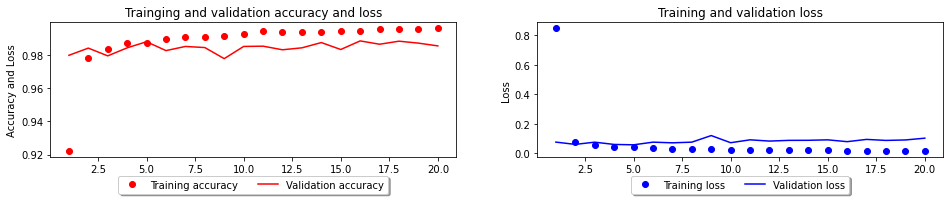

In [ ]:
show_graph(history.history)

에폭의 결과 때문에 편차가 심하여 첫 에폭을 제외하고 보도록 하겠습니다.

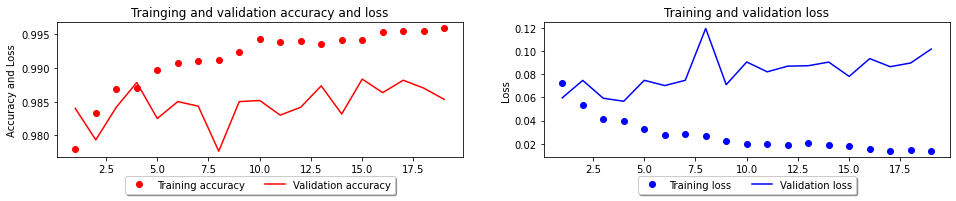

In [ ]:
m = map(lambda x: (x[0], x[1][1:]), history.history.items())
not_noise_history = dict(list(m))
show_graph(not_noise_history)

검증세트의 손실을 보니 8번째 에폭부터 과대적합이 된 것 같네요.<br/>
과대적합을 해결할 수 있다면 정확도를 높일 수 있을까요 ?

## 과대적합 해결
위와 같은 과대적합을 피하는 방법으로는 여러가지 방법이 있는데요.<br/>
L1, L2 규제와 같은 정규화를 이용하여 가중치를 감쇠(Weight Decay)시키는 방법과 드랍아웃, 모델의 하이퍼파라메터 튜닝 등으로 과대적합을 피하려 할 수 있습니다.

### 모델의 재구성
기존 모델은 2단의 컨볼루션 레이어와 풀링 레이어 사용했습니다.<br/>
모델이 정보를 더 가질 수 있도록 레이어를 더 구성시키고, 드랍아웃과 L2 규제를 걸어 더 복잡한 모델이지만 과대적합은 피할 수 있도록 재구성해보죠.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Conv2D(
    input_shape=(28, 28, 1),
    filters=32, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal',
    kernel_regularizer=regularizers.l2(0.01),
))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(.5))

model.add(layers.Conv2D(
    filters=64, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal',
    kernel_regularizer=regularizers.l2(0.01),
))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(.5))

model.add(layers.Conv2D(
    filters=128, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal',
    kernel_regularizer=regularizers.l2(0.01),
))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(.5))

model.add(layers.Conv2D(
    filters=256, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal',
    kernel_regularizer=regularizers.l2(0.01),
))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(.5))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01),))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)        

아까보다 두개의 레이어를 더 추가했고, 파라메터 수가 2배 가까이 늘어난게 보입니다.<br/>
중간중간 드랍아웃이 적용되었고, 레이어별로 L2 정규화를 추가했습니다.<br/>
이러한 정규화 기법을 추가하지 않고 학습을 했다면 이전보다 더 빠르게 과대적합이 일어나겠죠?<br/>
그럼 드랍아웃과 L2규제를 추가한 이후로 모델이 과대적합을 어떻게 견뎌내는지 확인해봅시다.

### 모델 컴파일

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

### 학습시작
Dropout과 Weight Decay를 추가함으로써 과대적합을 막았고, 뉴런의 학습에 제약을 두었으니, 학습이 더뎌질 수 밖에 없습니다.<br/>
충분히 학습할 수 있도록 에폭수를 조금 더 늘려 학습을 진행하도록 합니다.

In [ ]:
history = model.fit(
    reshape_x_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_split=.1,
)

Epoch 1/30
422/422 [==============================] - 4s 8ms/step - loss: 8.4441 - acc: 0.1614 - val_loss: 4.9367 - val_acc: 0.2060
Epoch 2/30
422/422 [==============================] - 3s 8ms/step - loss: 4.4719 - acc: 0.2196 - val_loss: 4.1579 - val_acc: 0.2832
Epoch 3/30
422/422 [==============================] - 3s 8ms/step - loss: 3.6688 - acc: 0.2862 - val_loss: 3.1725 - val_acc: 0.5093
Epoch 4/30
422/422 [==============================] - 3s 8ms/step - loss: 2.7647 - acc: 0.4583 - val_loss: 1.7493 - val_acc: 0.8810
Epoch 5/30
422/422 [==============================] - 3s 8ms/step - loss: 1.8008 - acc: 0.7229 - val_loss: 1.1181 - val_acc: 0.9467
Epoch 6/30
422/422 [==============================] - 3s 8ms/step - loss: 1.2672 - acc: 0.8284 - val_loss: 0.7822 - val_acc: 0.9635
Epoch 7/30
422/422 [==============================] - 3s 8ms/step - loss: 0.9628 - acc: 0.8734 - val_loss: 0.5951 - val_acc: 0.9732
Epoch 8/30
422/422 [==============================] - 3s 7ms/step - loss: 0.

### 모델평가
정규화 기법을 적용한 학습 결과가 어떻게 변했는지 확인 해봅시다.

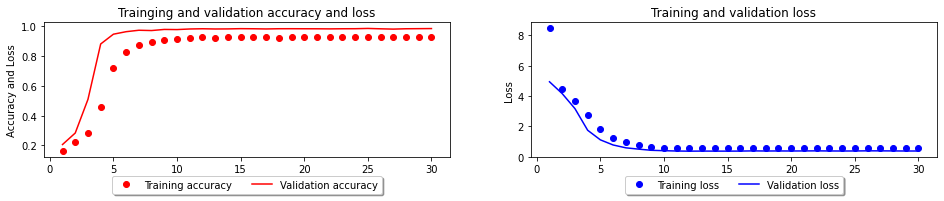

In [ ]:
show_graph(history.history)

가중치의 급격환 변화를 L2 규제를 통해 막아두어 처음 2에폭까지는 큰 변화가 없다가 3~5 에폭이 지나서 모델이 높은 성능에 근접해지는걸 확인할 수 있습니다.<br/>
그럼 조금 더 자세하게 볼 수 있도록 첫 5에폭까지의 데이터는 제외하고 이후의 데이터를 그래프로 확인해보겠습니다.

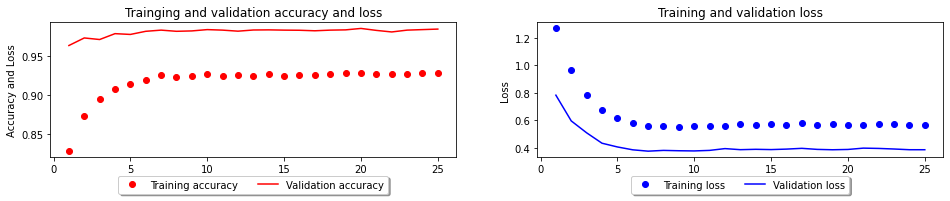

In [ ]:
m = map(lambda x: (x[0], x[1][5:]), history.history.items())
not_noise_history = dict(list(m))
show_graph(not_noise_history)

트레이닝 세트의 정확도가 낮게 측정되는건 드랍아웃 때문입니다.<br/>
학습마다 몇몇의 특정 뉴런을 비활성화 시키기 때문에 정확도가 낮아지게 됩니다.<br/>
훈련을 마친 이후 예측시에는 드랍아웃 시키는 뉴런의 수를 0%로 맞추고 사용합니다.
(모든 뉴런을 사용)

In [ ]:
model.evaluate(
    reshape_x_train,
    y_train
)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3969 - acc: 0.9801


[0.3968812823295593, 0.9800500273704529]

In [ ]:
model.evaluate(
    reshape_x_test,
    y_test
)

313/313 [==============================] - 2s 5ms/step - loss: 0.3897 - acc: 0.9827


[0.3896848261356354, 0.982699990272522]

테스트 세트의 손실과 정확도입니다.<br/>
98%의 정확도를 보여주고 있습니다.<br/>
모델의 네트워크를 변경하여 99% 정확도에 도전해봅시다.<br/>